# LIBRAIRIE

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import BayesianRidge
import missingno as msno 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from IPython.display import Image


In [6]:
import import_ipynb
from fonction import *

## 1) Chargement et analyse préliminaire des données

### a) Après avoir pris connaissance du dataset (auto-mpg-dataset.txt) et de sa description (auto- mpg-description.txt), indiquez pour chaque colonne si la variable est qualitative ou quantitative.

 1. mpg (miles per gallon) quantitative
    2. cylinders  quantitative
    3. displacement quantitative
    4. horsepower  qualitative
    5. weight quantitative
    6. acceleration quantitative
    7. model year qualitative
    8. origin (1. america, 2: europe, 3: asia) qualitative
    9. car name qualitative


    b) Charger les données à partir du fichier texte contenant le dataset. L’objectif est de parvenir à un objet pandas.DataFrame.
Pour y parvenir, vous pouvez au choix :

    • écrire une fonction qui analyse le contenu du fichier pour en extraire les différentes
données

    • écrire une fonction qui transforme le fichier afin de le transformer en un fichier CSV
valide que vous pourrez lire avec la fonction pandas.read_csv.

In [7]:
path_dataset="/Users/edouardnadaud/Desktop/ModelePourLaData/Dataset/auto-mpg-dataset.txt"
path_datset_csv="/Users/edouardnadaud/Desktop/ModelePourLaData/Dataset/auto-mpg-dataset.csv"

            txt_to_csv(path_src, path_dst)

In [8]:
df=txt_to_csv(path_dataset,path_datset_csv)
df.head(10)

,mpg,cylinders quantitative,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1.0,chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,plymouth fury iii
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1.0,pontiac catalina
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1.0,amc ambassador dpl


    c) Déterminer pour chaque colonne, à l’aide d’une fonction, le nombre de valeurs manquantes et leur taux 
$\frac{\# valeurs manquantes}{\# valeurs total}$
    
 


            columns_na(df)

La colonne  mpg  a  8  valeurs manquantes, soit  1.9704433497536944 % de valeurs manquantes
La colonne  horsepower  a  6  valeurs manquantes, soit  1.4778325123152707 % de valeurs manquantes


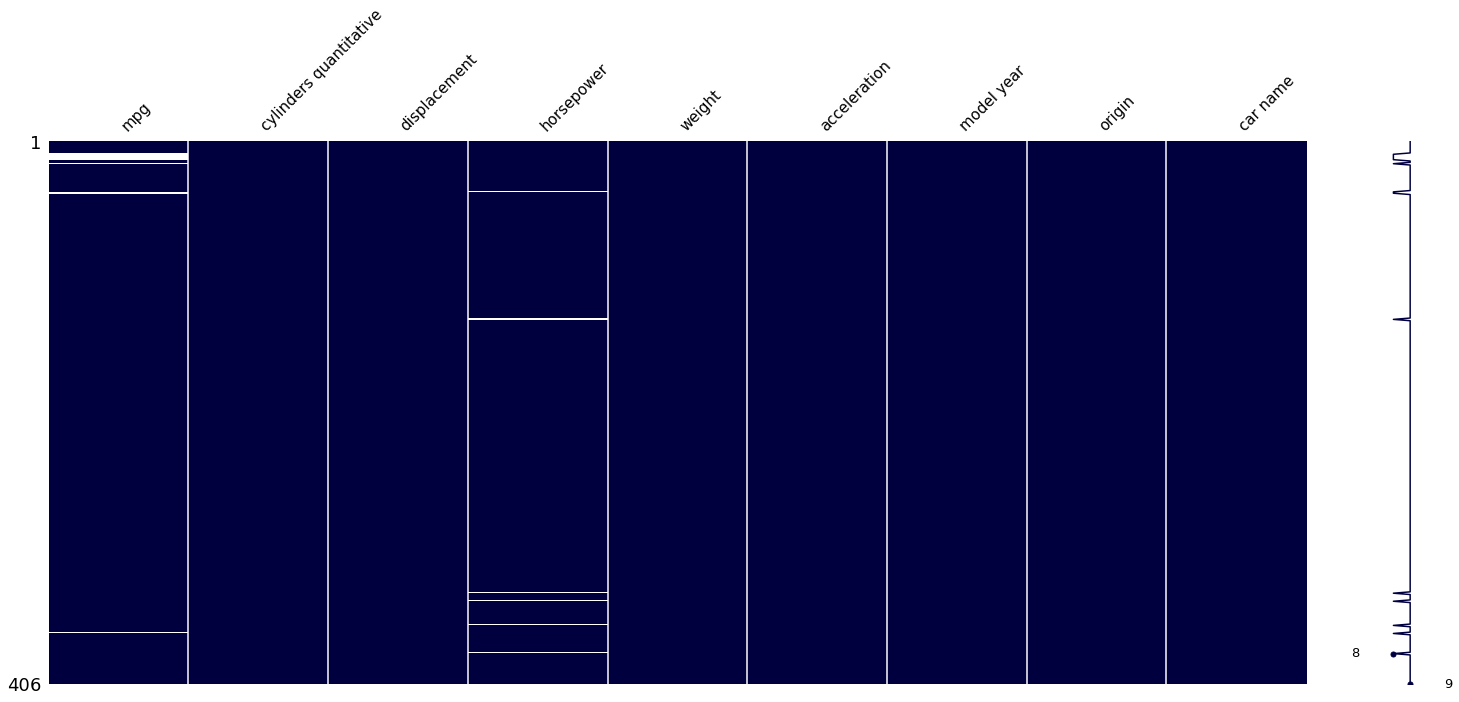

In [9]:
columns_na(df)

#### Visualisation de nos données manquantes

    -Nous pouvons observer que les valeurs null (nan) ce situe uniquement dans les colonnes mpg et horsepower et que elles sont minoritairess dans le dataset

    d) Représenter graphiquement les données à l’aide de plusieurs nuages de points en deux di- mensions. L’axe vertical devra correspondre à la consommation (première colonne) et l’axe horizontal de- vra correspondre successivement à toutes les autres variables quantitatives.


In [10]:
columns=df.columns

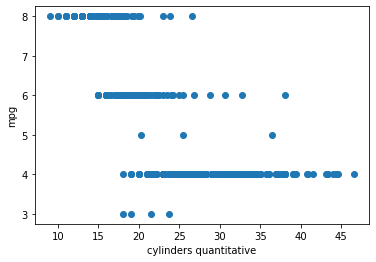

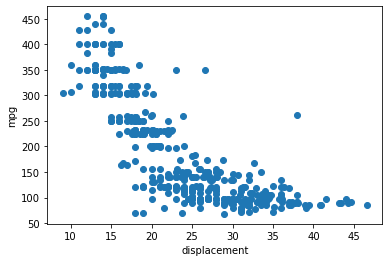

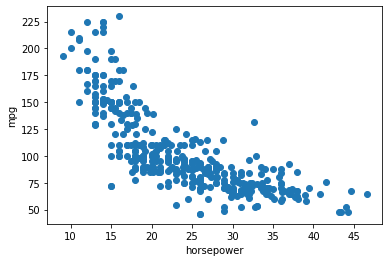

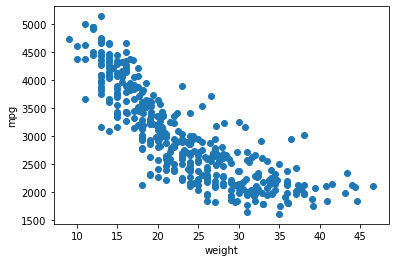

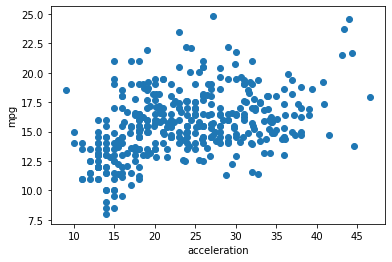

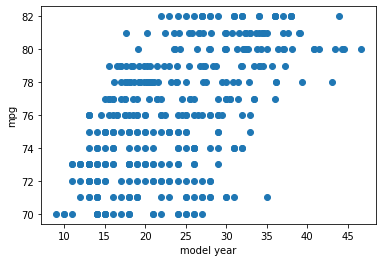

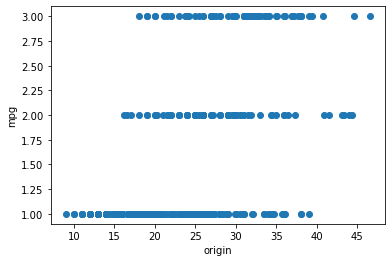

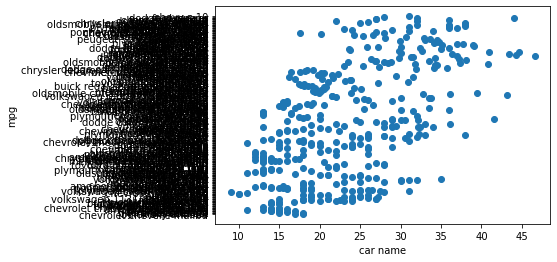

In [11]:
for i in columns[1::]:
    plt.figure()
    plt.scatter(df["mpg"],df[i])
    plt.xlabel(i)
    plt.ylabel("mpg")
    plt.show()

Nous pouvons observer certaine corrélation entre des variable:

    - MPG/Displacement r<0
    - mpg/Horsepower r<0
    - mpg/weight r<0
    
    Peut-on donc prédire les données par régression/correlation? 

#### Matrice de corrélation

In [12]:
corrMatrix = df.corr()

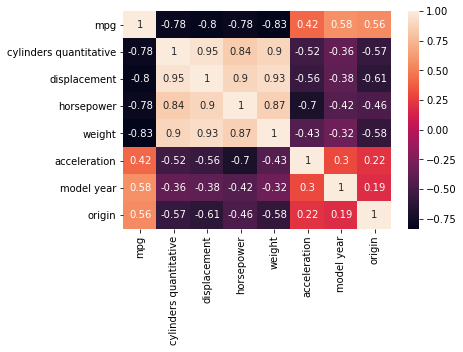

In [13]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

Grâce a cette heat map nous pouvons confirmer les forte corrélation negativee entre mpg et la quantité de cylindre du vehiculte, son deplacement, le nombre de chevaux et son poids. 

## 2) Transformation du dataset : variation du taux de données manquantes

Vous avez sans doute remarqué que le nombre de données manquantes dans ce dataset est rela-
tivement faible.
Afin de pouvoir mettre en œuvre les méthodes présentées en cours et dans la suite de cette activi- té et de pouvoir étudier leur efficacité, nous nous proposons de venir augmenter artificiellement cette proportion, à un taux arbitraire, en venant supprimer des données présentes.
Vous devez donc écrire deux fonctions :

        a)une première qui supprimera aléatoirement des données dans une colonne donnée, de façon à ce que le taux de valeurs manquantes pour cette variable devienne égal à une valeur fixée arbitrairement par l’utilisateur 
        
    Attention : il faut prendre en compte les données qui sont déjà manquantes avant la suppression pour le calcul du taux final de valeurs manquantes.

        sup_values_columns(columns_name, pourcentage,dataset)

    b)une seconde qui supprimera aléatoirement des données dans l’ensemble du da- taframe (n’importe quelle colonne peut donc être concernée) de façon à ce que le taux de valeurs manquantes, au total, devienne égal à une valeur fixée arbitrairement par l’utilisateur.

    Attention : il faut prendre en compte les données qui sont déjà manquantes avant la suppression pour le calcul du taux final de valeurs manquantes.

            sup_values_datasete(pourcentage,dataset) 

    3) Utilisation de méthodes avec suppression de données
    
Dans cette partie, on propose de régler le problème des données manquantes en se limitant aux données disponibles, en réalisant soit une analyse des cas concrets, ou une analyse de cas disponibles.
Vous devrez donc écrire deux fonctions :
    
    1. Analyse des cas concrets : la fonction prend en entrée le dataframe et ne renvoie que les lignes qui ne comportent pas de données manquantes.


            analyse_des_cas_concret(dataset)

    2. Analyse des données disponibles : la fonction prend en entrée le dataframe et un taux maximal, et renvoie une copie des données où les variables dont le taux de valeurs manquantes (cf. 2.1) dépassant ce taux ont été retirées.

          Analyse_des_données_disponibles(taux,dataset)

           Analyse_des_données_disponibles_V2(pourcentage,dataset)

*PS: Nous avons réalisé deux version, une supprimant une colonne ayant un taux de données manquantes trop importante (**Analyse_des_données_disponibles_V2**) 
et une supprimant les lignes ayant un taux de na superieures aux nombres demandé (**Analyse_des_données_disponibles**)*

# 4) Utilisation de méthodes avec imputation de données

Dans cette partie, on propose de régler le problème des données manquantes en les complétant en fixant leur valeur à l’aide du méthode dite d’imputation.


    4.1.) Imputation univariée
Après avoir rappelé le principe et le fonctionnement d’une imputation univariée, utiliser la classe *sklearn.impute.SimpleImputer* pour compléter les données manquantes, en essayant différentes stratégies d’imputation.
* Discuter de son intérêt, et de ses limitations potentielles.

Dans un premier temps, intéressons à l’imputation univariée, c’est-à-dire imputer les valeurs manquantes par une valeur unique à chaque colonne.
C'est à dire toutes les valeurs manquante d'une meme colonne sont remplacée par la même valeur
Avantage:

    - Rapide a implementer
    - Pas d'aberation
    - simple a comprendre
    
Desavantage:

    - Supprime la tendance 
    - Reduit la variance
    - Donne une densité plus importante a une valeur choisie, change les probabilités


In [14]:
#Nous devons travailler que sur des données de type float

#on enleve car name
df2=df[list(df.columns[:8])]

# on lui mets 30 pourcent de nan pour travailler
df2=sup_values_datasete(30,df2)

In [15]:
df2

,mpg,cylinders quantitative,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,NaN,NaN,3504.0,12.0,NaN,1.0
1,15.0,8.0,350.0,165.0,3693.0,NaN,70.0,1.0
2,NaN,8.0,318.0,NaN,3436.0,NaN,70.0,NaN
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,NaN
4,NaN,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
401,27.0,NaN,140.0,86.0,2790.0,15.6,82.0,1.0
402,44.0,NaN,97.0,NaN,2130.0,24.6,82.0,2.0
403,32.0,4.0,135.0,NaN,2295.0,11.6,82.0,1.0
404,28.0,4.0,NaN,79.0,2625.0,18.6,NaN,1.0


#### Visualisation des données manquantes

<AxesSubplot:>

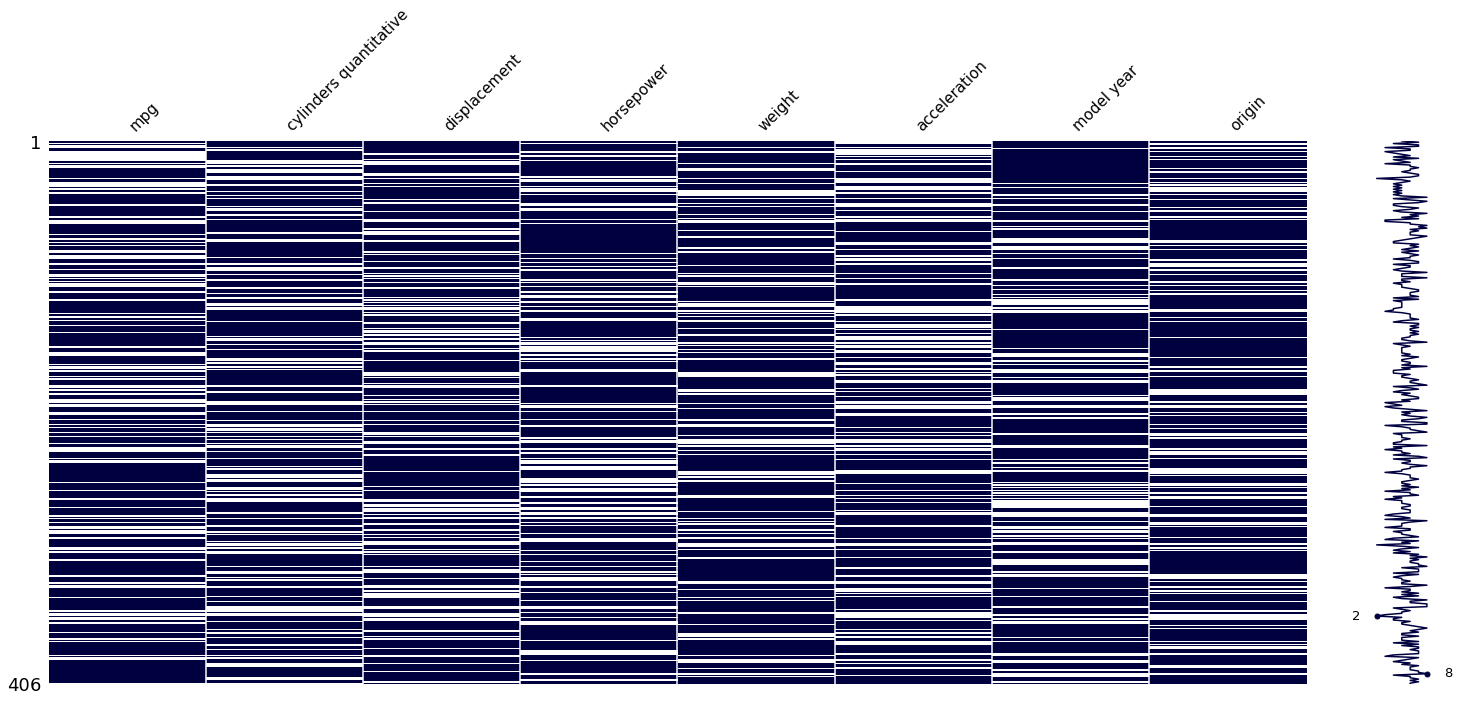

In [16]:
msno.matrix(df2,color=(0, 0, 0.25),fontsize=15,)

In [17]:
#affichage des statistique avant la modification
df2.describe()

,mpg,cylinders quantitative,displacement,horsepower,weight,acceleration,model year,origin
count,282.000000,278.000000,282.000000,285.000000,298.000000,267.000000,290.000000,292.000000
mean,24.217021,5.417266,195.590426,105.694737,2986.526846,15.579026,75.755172,1.534247
std,7.743963,1.701133,104.197492,39.241956,854.587230,2.880047,3.858042,0.765802
min,11.000000,3.000000,68.000000,46.000000,1755.000000,8.000000,70.000000,1.000000
25%,18.000000,4.000000,105.500000,76.000000,2236.750000,13.550000,73.000000,1.000000
50%,24.000000,4.000000,151.000000,95.000000,2792.500000,15.400000,76.000000,1.000000
75%,30.000000,8.000000,260.000000,130.000000,3612.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


* Pour appuyer nos resultats nous prendrons comme exemple la colonne "mpg" et "acceleration"

**Distribution "mpg" et "model year" avant imputation**

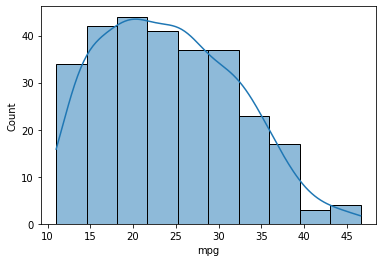

In [85]:
sns.histplot(df2["mpg"], kde=True);

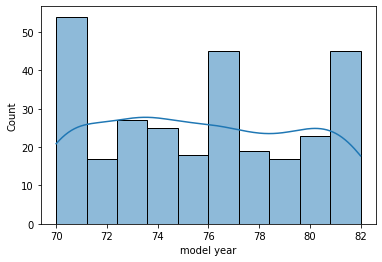

In [86]:
sns.histplot(df2["model year"], kde=True);

In [18]:
#on copie pour ne pas toucher au stats de df2 et tester plusieur strategie
df_mean_impt = df2.copy() 
#on test l'imputation par la moyenne
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df_mean_impt)
df_mean_impt=imp_mean.transform(df_mean_impt)
#on retransforme en df
df_mean_impt = pd.DataFrame(df_mean_impt, columns = ['mpg','cylinders quantitative','displacement','horsepower','weight','acceleration','model year','origin'])



In [19]:
df_mean_impt.describe()

,mpg,cylinders quantitative,displacement,horsepower,weight,acceleration,model year,origin
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,24.217021,5.417266,195.590426,105.694737,2986.526846,15.579026,75.755172,1.534247
std,6.450434,1.406859,86.792643,32.861116,731.824782,2.334065,3.259030,0.649135
min,11.000000,3.000000,68.000000,46.000000,1755.000000,8.000000,70.000000,1.000000
25%,20.350000,4.000000,121.000000,86.000000,2396.500000,14.500000,74.000000,1.000000
50%,24.217021,5.417266,195.590426,105.694737,2986.526846,15.579026,75.755172,1.534247
75%,26.950000,6.000000,231.000000,107.423684,3347.000000,16.000000,78.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


**Distribution "mpg" et "model year" apress imputation par la moyenne**

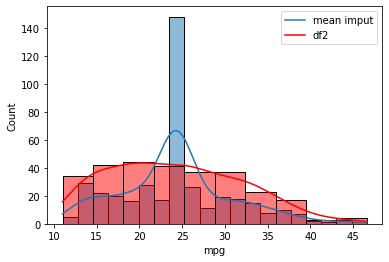

In [148]:
sns.histplot(df_mean_impt["mpg"], kde=True)
sns.histplot(df2["mpg"],kde=True,legend="Dataset",color="red")
plt.legend(("mean imput","df2"))

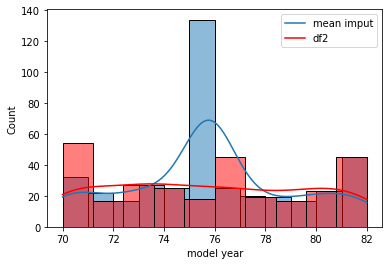

In [149]:
sns.histplot(df_mean_impt["model year"], kde=True);
sns.histplot(df2["model year"],kde=True,legend="Dataset",color="red")
plt.legend(("mean imput","df2"))

le dataset et nos données de features ont une distribution bcp plus important sur la valeur moyenne et perdent leur incertitude

In [20]:
#etudes des variations entre les deux describe
df_diff_mean=df_mean_impt.describe()-df2.describe()

In [21]:
df_diff_mean

,mpg,cylinders quantitative,displacement,horsepower,weight,acceleration,model year,origin
count,1.240000e+02,1.280000e+02,1.240000e+02,1.210000e+02,1.080000e+02,1.390000e+02,1.160000e+02,1.140000e+02
mean,4.618528e-14,1.509903e-14,6.821210e-13,-8.526513e-14,-2.728484e-12,2.486900e-14,-9.947598e-14,6.661338e-16
std,-1.293529e+00,-2.942737e-01,-1.740485e+01,-6.380840e+00,-1.227624e+02,-5.459824e-01,-5.990120e-01,-1.166663e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.350000e+00,0.000000e+00,1.550000e+01,1.000000e+01,1.597500e+02,9.500000e-01,1.000000e+00,0.000000e+00
50%,2.170213e-01,1.417266e+00,4.459043e+01,1.069474e+01,1.940268e+02,1.790262e-01,-2.448276e-01,5.342466e-01
75%,-3.050000e+00,-2.000000e+00,-2.900000e+01,-2.257632e+01,-2.650000e+02,-1.200000e+00,-1.000000e+00,0.000000e+00
max,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


Nous pouvons observer que la moyenne ne varie pas ce qui est normal car nous imputons par la moyenne en revange l'ecart type diminue car nous donnons plus d'importance a la densite de valeur au niveau de la moyenne

In [22]:
#on copie pour ne pas toucher au stats de df2 et tester plusieur strategie
df_median_impt = df2.copy() 
#on test l'imputation par la median
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(df_median_impt)
df_median_impt=imp_median.transform(df_median_impt)
#on retransforme en df
df_median_impt = pd.DataFrame(df_median_impt, columns = ['mpg','cylinders quantitative','displacement','horsepower','weight','acceleration','model year','origin'])




In [23]:
df_median_impt.describe()

,mpg,cylinders quantitative,displacement,horsepower,weight,acceleration,model year,origin
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,24.150739,4.970443,181.971675,102.507389,2934.913793,15.517734,75.825123,1.384236
std,6.451210,1.553686,89.195290,33.224098,736.841958,2.335614,3.260911,0.692213
min,11.000000,3.000000,68.000000,46.000000,1755.000000,8.000000,70.000000,1.000000
25%,20.350000,4.000000,121.000000,86.000000,2396.500000,14.500000,74.000000,1.000000
50%,24.000000,4.000000,151.000000,95.000000,2792.500000,15.400000,76.000000,1.000000
75%,26.950000,6.000000,231.000000,107.250000,3347.000000,16.000000,78.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


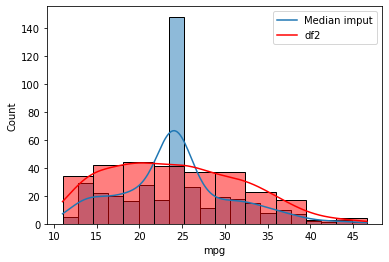

In [142]:
sns.histplot(df_median_impt["mpg"], kde=True);
sns.histplot(df2["mpg"],kde=True,legend="Dataset",color="red")
plt.legend(("Median imput","df2"))

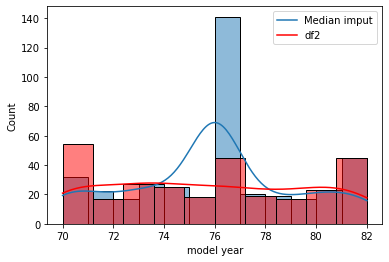

In [143]:
sns.histplot(df_median_impt["model year"], kde=True);
sns.histplot(df2["model year"],kde=True,legend="Dataset",color="red")
plt.legend(("Median imput","df2"))

De même que pour la variance nous avons une distribution bcp plus eleve au niveaux de la mediane != de ela moyenne notre dataset perd en incertitude

In [24]:
#etudes des variations entre les deux describe
df_diff_median=df_median_impt.describe()-df2.describe()

In [25]:
df_diff_median

,mpg,cylinders quantitative,displacement,horsepower,weight,acceleration,model year,origin
count,124.000000,128.000000,124.000000,121.000000,108.000000,139.000000,116.000000,114.000000
mean,-0.066282,-0.446823,-13.618751,-3.187348,-51.613053,-0.061292,0.069951,-0.150010
std,-1.292753,-0.147447,-15.002201,-6.017858,-117.745272,-0.544433,-0.597131,-0.073589
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.350000,0.000000,15.500000,10.000000,159.750000,0.950000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-3.050000,-2.000000,-29.000000,-22.750000,-265.000000,-1.200000,-1.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Nous pouvons observer que la mediane (50%) ne varie pas ce qui est normal car nous imputons par la mediane en revange l'ecart type et la moyenne varie en effet mediane != moyenne

    4.2.) Imputation par la méthode des k plus proches voisins (kNN)
Il est possible de réaliser l’imputation en utilisant l’algorithme des k plus proches voisins.
On considérera alors pour une instance présentant une donnée ou plusieurs données manquantes ses k plus proches voisins (au sens d’une métrique donnée) qui seront alors utilisés pour déterminer les valeurs manquantes en effectuant une moyenne (éventuelle- ment pondérée selon la distance) des variables concernées.
Nous utiliserons la classe sklearn.impute.KNNImputer qui permet de mettre en œuvre cette méthode d’imputation.

    a) Expliquer le fonctionnement de la métrique par défaut utilisée par cette classe pour déterminer ses plus proches voisins.


Explication:
Comme pourla classification par KNN, la méthode des plus proches voi- sins nécessite le choix du paramètre k par optimisation d’un critère. De plus, la notion de distance entre les individus doit être choisie avec précaution. On considèrera usuellement la distance Euclidienne ou de Mahalanobis.
méthode des kNN : l’idée est de calculer les distances entre observations, et d’attribuer aux valeurs manquante la moyenne des valeurs observées chez les k plus proches voisins

#### Algorithme du Knn

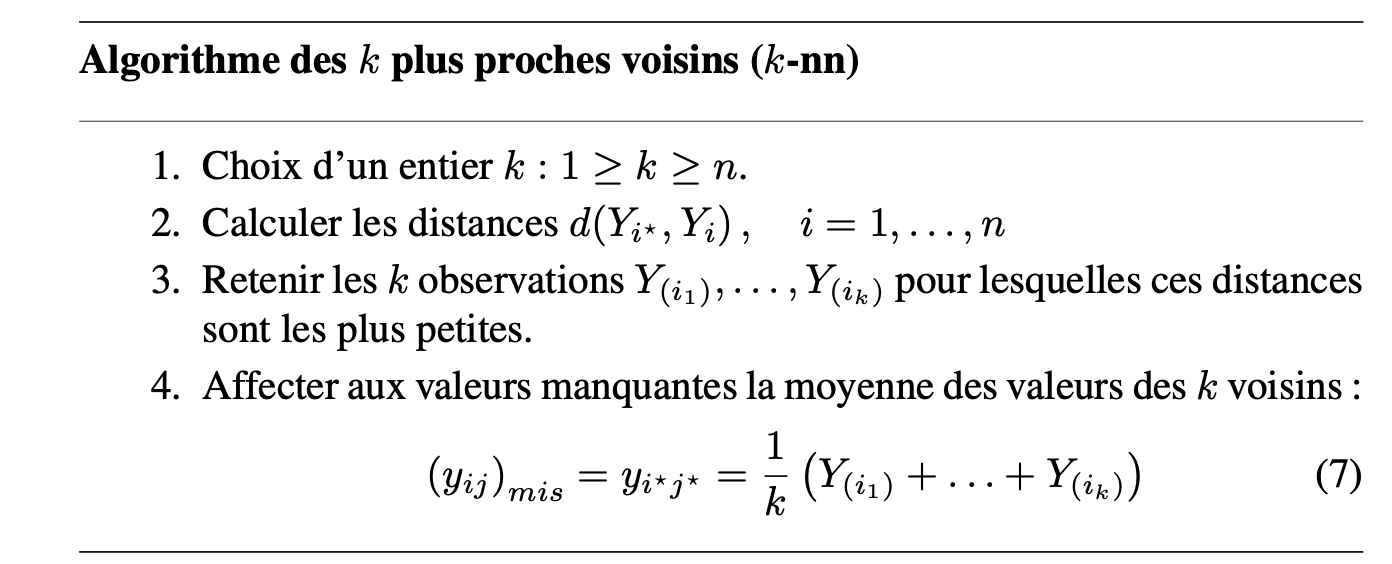

In [84]:
Image("knn.png")

#### Metrique

metrique utilisée= nan euclidienne, (distance euclidienne); comment cela est possible de faire une distance euclidienne avec des valeur nulle ?

    - dist(x,y) = sqrt(poids * sqrt( distance entre les coordonnées existante) ou, poids = total de coordonnée /nombre minimun de coordonnée presente
    
---------------------------------------------------------------------------------------------------------------
 $ dist_{(x,y)} $ = $ \sqrt{poids*x+y} $
 
 $ poid=\frac{Total_{coordonée}}{Nombre minimun coordonée_{presente}} $
 
--------------------------------------------------------------------------------------------------------------- 
 
 **Exemple :**
 
 array1=[1 na na 3]
 
 array2=[4 na 3 5]
 
 *$ dist_{(array1,array2)} $ = $ \sqrt{\frac{4}{2} * ((1-4)^2+(3-5)^2} $*
 
 --------------------------------------------------------------------

In [27]:
df2.describe()

,mpg,cylinders quantitative,displacement,horsepower,weight,acceleration,model year,origin
count,282.000000,278.000000,282.000000,285.000000,298.000000,267.000000,290.000000,292.000000
mean,24.217021,5.417266,195.590426,105.694737,2986.526846,15.579026,75.755172,1.534247
std,7.743963,1.701133,104.197492,39.241956,854.587230,2.880047,3.858042,0.765802
min,11.000000,3.000000,68.000000,46.000000,1755.000000,8.000000,70.000000,1.000000
25%,18.000000,4.000000,105.500000,76.000000,2236.750000,13.550000,73.000000,1.000000
50%,24.000000,4.000000,151.000000,95.000000,2792.500000,15.400000,76.000000,1.000000
75%,30.000000,8.000000,260.000000,130.000000,3612.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


     b) Réaliser l’imputation des données manquantes en utilisant cette classe.

In [28]:
#on copie pour ne pas toucher au stats de df2 et tester plusieur strategie
df_KNN_impt = df2.copy() 
#on test l'imputation par KNN
imp_KNN = KNNImputer(n_neighbors=2)
imp_KNN.fit(df_KNN_impt)
df_KNN_impt=imp_KNN.transform(df_KNN_impt)
#on retransforme en df
df_KNN_impt = pd.DataFrame(df_KNN_impt, columns = ['mpg','cylinders quantitative','displacement','horsepower','weight','acceleration','model year','origin'])

In [29]:
df_KNN_impt.describe()

,mpg,cylinders quantitative,displacement,horsepower,weight,acceleration,model year,origin
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.703695,5.586207,200.407635,106.121921,2993.098522,15.509729,75.199507,1.589901
std,7.546212,1.661832,106.863167,38.552264,812.844423,2.642466,3.628025,0.755177
min,11.000000,3.000000,68.000000,46.000000,1755.000000,8.000000,70.000000,1.000000
25%,17.750000,4.000000,107.000000,75.000000,2265.000000,13.825000,72.000000,1.000000
50%,23.000000,5.000000,155.500000,95.000000,2832.500000,15.475000,75.000000,1.000000
75%,29.000000,7.000000,297.875000,132.500000,3608.000000,17.000000,78.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


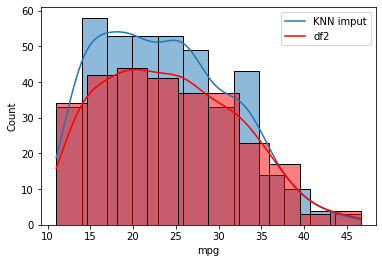

In [135]:
sns.histplot(df_KNN_impt["mpg"],kde=True,legend="KNN imput")
sns.histplot(df2["mpg"],kde=True,legend="Dataset",color="red")
plt.legend(("KNN imput","df2"))


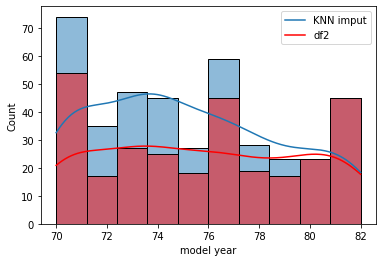

In [136]:
sns.histplot(df_KNN_impt["model year"], kde=True);
sns.histplot(df2["model year"],kde=True,legend="Dataset",color="red")
plt.legend(("KNN imput","df2"))

Knn créer une distribution semblable avec une courbe de distribution presque identique il y a juste plus de données. Néanmoins knn ne créeera pas de nouvelle valeures

In [30]:
#etudes des variations entre les deux describe
df_diff_knn=df_KNN_impt.describe()-df2.describe()

In [31]:
df_diff_knn

,mpg,cylinders quantitative,displacement,horsepower,weight,acceleration,model year,origin
count,124.000000,128.000000,124.000000,121.000000,108.000000,139.000000,116.000000,114.000000
mean,-0.513327,0.168941,4.817210,0.427184,6.571677,-0.069297,-0.555665,0.055655
std,-0.197751,-0.039301,2.665676,-0.689692,-41.742808,-0.237581,-0.230017,-0.010624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.250000,0.000000,1.500000,-1.000000,28.250000,0.275000,-1.000000,0.000000
50%,-1.000000,1.000000,4.500000,0.000000,40.000000,0.075000,-1.000000,0.000000
75%,-1.000000,-1.000000,37.875000,2.500000,-4.000000,-0.200000,-1.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 4.3.) Imputation multivariée
Enfin, il est également possible de réaliser l’imputation des données manquantes en es- sayant de les prédire à partir des autres paramètres présents. C’est l’objet de l’imputation multivariée.
Pour ce faire, on utilisera pour chaque variable présentant des données manquantes un estimateur (qui sera donc un classifieur pour une variable qualitative, et un régresseur pour une variable quantitative) qui sera entraîné sur les autres variables.
La classe sklearn.impute.IterativeImputer permet de mettre en œuvre ce type d’imputation.

    a) Expliquer succinctement le fonctionnement par défaut de cette classe.

a)
    Chaque feature peut etre considéré comme une fonction des autres feature ( exemple la regression lienaire qui permet de predire une valeur) on Change de maniere sequentielle les valeurs une a une ce qui modifie les valeurs que la feature d'apres peut prendre car on lui rajoute un element a sa fontion.
de  nombreux algo de regression peuvent etre utilisé pour predire les valeurs mais pour etre plus simple le modele lineaire est pas mal utilisé

   * On maintient la variabilité des donnéees d'origine en se basant usr des variable corréléeess entre elle et les caussse de l'abscence

   * De plus cette algorithme prend en compte une certaine incertitude en créeant des versions sdifférentees des donnéess manques et less valeurs observée dans les ensemble de données imputéss



**Algorithme Imputation multiple:**

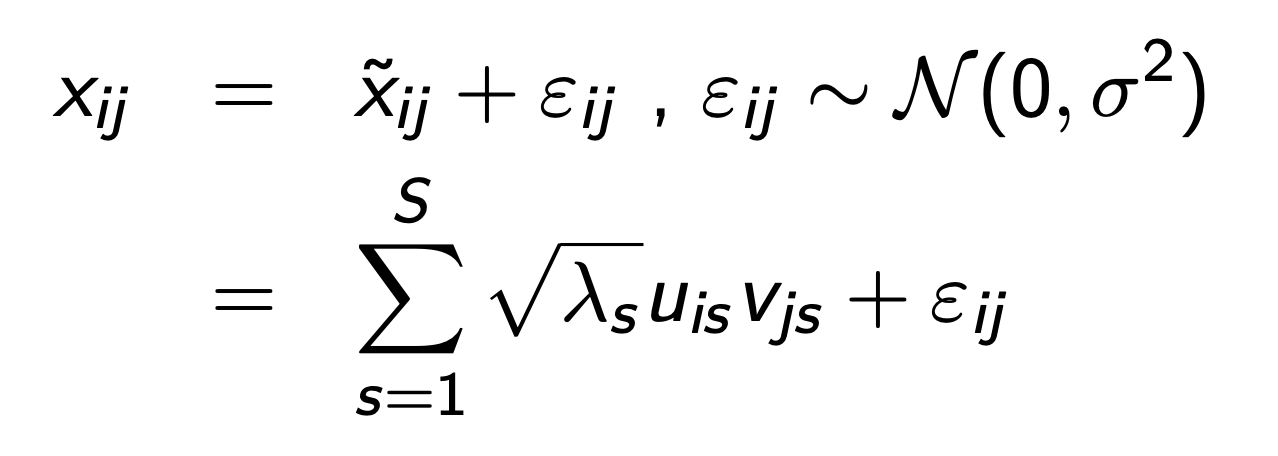

In [83]:
Image("Données manquante.png")

    b) Réaliser l’imputation des données manquantes en utilisant cette classe.

In [33]:
#on copie pour ne pas toucher au stats de df2 et tester plusieur strategie
df_iterative_impt = df2.copy() 
# definition du modele imputer
imputer = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
# fit sur le dataset
imputer.fit(df_iterative_impt)
# transform du dataset
df_iterative_impt = imputer.transform(df_iterative_impt)
#on retransforme en df
df_iterative_impt = pd.DataFrame(df_iterative_impt, columns = ['mpg','cylinders quantitative','displacement','horsepower','weight','acceleration','model year','origin'])


/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [34]:
df_iterative_impt.describe()

,mpg,cylinders quantitative,displacement,horsepower,weight,acceleration,model year,origin
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.297598,5.459696,195.583996,104.746121,2982.666881,15.565603,75.794671,1.542933
std,7.746427,1.688323,105.137346,38.288312,863.695379,2.686992,3.749262,0.724679
min,6.496054,2.909915,45.622925,29.791569,1290.316719,7.377075,66.132283,-1.091323
25%,17.500000,4.000000,105.000000,77.457153,2235.725682,13.995491,73.000000,1.000000
50%,23.000000,4.671536,151.000000,94.403766,2790.723395,15.643695,76.000000,1.000000
75%,29.000000,6.995675,282.213617,129.916651,3608.000000,17.143292,78.016354,2.000000
max,46.600000,9.052773,478.925199,230.000000,5251.599532,24.800000,91.828242,3.000000


In [35]:
#etudes des variations entre les deux describe
df_diff_iterative=df_iterative_impt.describe()-df2.describe()

In [36]:
df_diff_iterative

,mpg,cylinders quantitative,displacement,horsepower,weight,acceleration,model year,origin
count,124.000000,128.000000,124.000000,121.000000,108.000000,139.000000,116.000000,114.000000
mean,-0.919424,0.042430,-0.006430,-0.948616,-3.859965,-0.013423,0.039498,0.008686
std,0.002464,-0.012810,0.939855,-0.953644,9.108149,-0.193055,-0.108781,-0.041122
min,-4.503946,-0.090085,-22.377075,-16.208431,-464.683281,-0.622925,-3.867717,-2.091323
25%,-0.500000,0.000000,-0.500000,1.457153,-1.024318,0.445491,0.000000,0.000000
50%,-1.000000,0.671536,0.000000,-0.596234,-1.776605,0.243695,0.000000,0.000000
75%,-1.000000,-1.004325,22.213617,-0.083349,-4.000000,-0.056708,-0.983646,0.000000
max,0.000000,1.052773,23.925199,0.000000,111.599532,0.000000,9.828242,0.000000


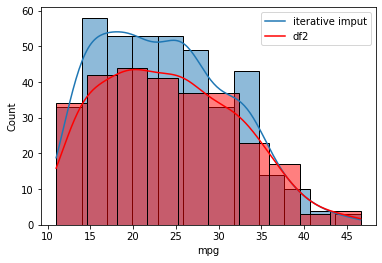

In [151]:
sns.histplot(df_KNN_impt["mpg"], kde=True);
sns.histplot(df2["mpg"],kde=True,legend="Dataset",color="red")
plt.legend(("iterative imput","df2"))

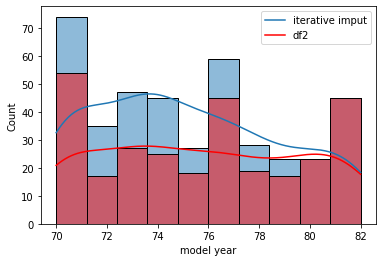

In [152]:
sns.histplot(df_KNN_impt["model year"], kde=True);
sns.histplot(df2["model year"],kde=True,legend="Dataset",color="red")
plt.legend(("iterative imput","df2"))

    c) Discuter de son intérêt et des limitations potentielles, en abordant notamment le cas de données manquantes de type MAR ou MNAR, et de la différence avec les méthodes précédentes.

# 5) Tâche de régression associée, évaluation des méthodes d’imputation
On cherche maintenant à prédire la variable mpg à l’aide d’une (ou plusieurs) variable(s) explica- tive(s). On utilisera la classe *sklearn.linear_model.LinearRegression*.

    5.1. Analyse de la matrice de corrélation
En travaillant sur les données initiales (sans données manquantes), calculer et afficher la matrice de corrélation :


*import seaborn as sns*

*corrmat = data.corr()*

*sns.heatmap(corrmat,annot = True)*

**Analyse**
* Nouss voyons que MPG est fortement corrélé negativement avec cylunders quantitative, displacement, horssepower et weight ce qui apress tout parait logique

* Displacement esst fortement correllée positivement (R>1) avec horsepower et le poids

Nous pouvons donc deduire que la consomation est une fonction du poids, nombre de cylindre et de la puisssance de la voiture, comme cela esst corellé negativement plus ils augment plus la consomation est élévé

De plus le displacement est une fonction de la puissance (horsepower) et du poids de la voiture


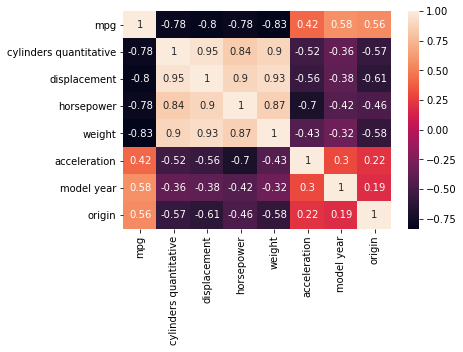

In [37]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

* Déterminer la variable explicative la plus corrélée (notée X) à la variable à prédire (y).

Nous voyons que la variable a predire ( la variable avec le plus de donnée corrélé) est df["displacement"]
De plus MPG a le plus de données diplacement
Nous deffinissons donc mpg comme varibale a prédire Y=df["displacement"]

La variable explicative la plus corrélé est le diplacement avec 0.8 soit X=df["horsepower"]

 Dans df_nocarnames nous avons supprimé la colonnes car_name, c'est une valeur quantitative avec plus de 305 valeur différentes elle est donc peut utile pour predire de pluss si il manque une données nous ne puvons pas la deviner car trop de car_name differents par rapprot au nombre de valeurs

In [38]:
df_nocarnames=df.copy()
df_nocarnames=df_nocarnames.drop("car name",axis=1)

### pour realiser nos test ssupprimons les lignes avec des nan

In [39]:
df_nocarnames= analyse_des_cas_concret(df_nocarnames)

In [40]:
X = df_nocarnames["horsepower"]
y= df_nocarnames["displacement"]

#### Series to dataframe

In [41]:
X=pd.DataFrame(data=X)
y=pd.DataFrame(data=y)

### a) Séparer les données en base d’apprentissage (70%) et de test.

#### split dataset

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state =0)

In [43]:
model = LinearRegression().fit(X_train, y_train)
model.score(X_train, y_train)

0.7832026429912768

### b) Déterminer les coefficients de la droite de régression (fonction fit) sur les données d’apprentissage.

#### Determination des coéfficients

In [44]:
print(model.coef_)

[[2.40883234]]


In [45]:
print(model.intercept_)

[-57.75411104]


###  c) Effectuer les prédictions sur les données de test (fonction predict) et estimer les performances : RMSE (Root Mean Squared Error) et R2 (r2_score)

In [46]:
y_predict = model.predict(X_test)
model_mse = mean_squared_error(y_predict, y_test) 
print(model_mse)
print(model.score(X_test, y_test))

1453.7643920144974
0.8796837809311613


## 5.3. Régression linéaire sur les données manquantes après imputation
Répéter les expériences précédentes en considérant successivement 20% et 50% de données manquantes imputées.
Présenter les résultats sous forme d’un graphe comparatif que vous commenterez.

#### 20 pourcent de données manquante

Dataset avec 20 de données manquante sur df["mpg"]

In [47]:
df_20pourcent=sup_values_datasete(20,df)

<string>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [48]:
X= df_20pourcent["horsepower"]
y= df_20pourcent["displacement"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state =0)

On separe les dataset avant d'imputé pour éviter une contamination 
Nous décidons d'imputer notre dataset avec une metehode itérative car plus performant et plus robuste

#### Creation des df train et test

In [50]:
dataframe_train=pd.concat([X_train, y_train],axis=1)
dataframe_test=pd.concat([X_test, y_test],axis=1)

### Imputation des données

#### Train

In [51]:
# definition du modele imputer
imputer = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
# fit sur le dataset
imputer.fit(dataframe_train)
# transform du dataset
dataframe_train = imputer.transform(dataframe_train)
#on retransforme en df
dataframe_train = pd.DataFrame(dataframe_train, columns = ['displacement','horsepower'])



In [52]:
dataframe_train.isnull().sum()

displacement    0
horsepower      0
dtype: int64

#### Test

In [53]:
# definition du modele imputer
imputer = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
# fit sur le dataset
imputer.fit(dataframe_test)
# transform du dataset
dataframe_test = imputer.transform(dataframe_test)
#on retransforme en df
dataframe_test = pd.DataFrame(dataframe_test, columns = ['displacement','horsepower'])



In [54]:
dataframe_test.isnull().sum()

displacement    0
horsepower      0
dtype: int64


#### recuperation des X_train,y_train,X_test,y_test concatené

In [55]:
X_train=dataframe_train["displacement"]
y_train=dataframe_train["horsepower"]
X_test=dataframe_test["displacement"]
y_test=dataframe_test["horsepower"]
#remise de series --> DF
X_train=pd.DataFrame(data=X_train)
y_train=pd.DataFrame(data=y_train)
X_test=pd.DataFrame(data=X_test)
y_test=pd.DataFrame(data=y_test)

#### Entrainement du model

In [56]:
model = LinearRegression().fit(X_train, y_train)
print(f"le score du model est de :{model.score(X_train, y_train)}")
print(f"Coef de la regresssion :{model.coef_[0][0]}")
print(f"Intercept du modele: {model.intercept_[0]}")

le score du model est de :0.85665993938501
Coef de la regresssion :2.575013169854754
Intercept du modele: -73.17859413077963


#### Test du model

In [57]:
y_predict = model.predict(X_test)
model_mse = mean_squared_error(y_predict, y_test) 
print(model_mse)
print(model.score(X_test, y_test))

1152.371610858533
0.9110820361494475


### Creation du dataframe train et test avec imputation

### df avec un taux d'imputation choisi

In [58]:
dataset20=sup_values_datasete(20,df)
dataset50=sup_values_datasete(50,df)

<string>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


            score_estimator_LR(name_columns_X,name_columns_Y,dataset,numbereofImputerchoosen)

### Imputation 20 pourcent du df

In [59]:
result_tab_train20=[]
result_tab_test20=[]
for i in range(1,5):
    a,b,mse1=score_estimator_LR("displacement","horsepower",dataset20,i)
    result_tab_train20.append(a)
    result_tab_test20.append(b)

### Imputation 50 pourcent du df

In [60]:
result_tab_train50=[]
result_tab_test50=[]
for i in range(1,5):
    a,b,mse2=score_estimator_LR("displacement","horsepower",dataset50,i)
    result_tab_train50.append(a)
    result_tab_test50.append(b)

In [61]:
tab_result=concat_tab(result_tab_train20,result_tab_test20,result_tab_train50,result_tab_test50,"Imputation 20%","Imputation 50%")

In [62]:
tab_result

,imputer_name,model,Imputation 20%,Imputation 50%
0,SimpleImputer_MEAN,train,0.536531,0.131402
1,SimpleImputer_MEDIAN,train,0.511879,0.089560
2,IterativeImputer,train,0.846379,0.913893
3,KNNImputer,train,0.817966,0.808098
0,SimpleImputer_MEAN,test,0.623228,0.236100
1,SimpleImputer_MEDIAN,test,0.594177,0.178033
2,IterativeImputer,test,0.894627,0.887224
3,KNNImputer,test,0.874120,0.815923


## historigrame de récapitulation

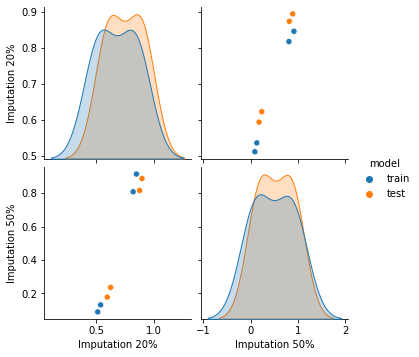

In [63]:
sns.pairplot(tab_result,hue="model")

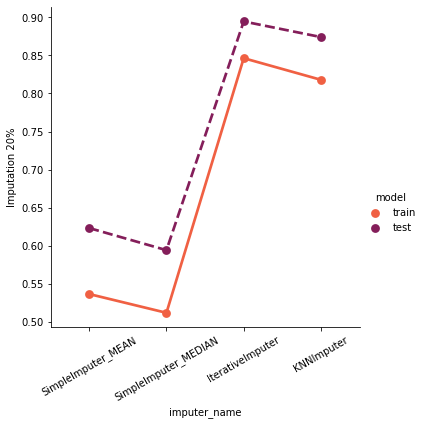

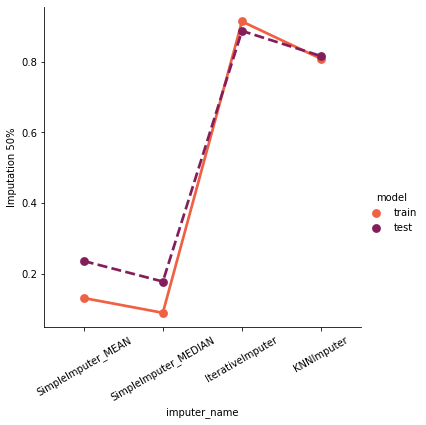

In [64]:

Pourcent20=sns.catplot(x='imputer_name', y='Imputation 20%',hue='model',data=tab_result, kind='point',linestyles=["-", "--"],palette="rocket_r")
Pourcent50=sns.catplot(x='imputer_name', y='Imputation 50%',hue='model',data=tab_result, kind='point',linestyles=["-", "--"],palette="rocket_r")
Pourcent20.set_xticklabels(rotation=30)
Pourcent50.set_xticklabels(rotation=30)


#### Analyse

Nous observons que les technique d'imutation simple offre des performances relativement base en imputation
De plus notre jeux de donnée etant petit les performances restent tres bonne quelque soit le pourcentage d'imputation des données du data set original

## 5.4. Pour finir...
Deux variables sont corrélées en valeur absolue... retournez au 5.1 pour vérifier la perti- nence de votre choix.

Une corrélation linéaire peut être encore améliorée en transformant astucieusement les données : comment ?

En tenant compte de ces deux remarques, refaire les parties 5.2 et 5.3 si nécessaire. Une grossière erreur s’est glissée quelque part. La question est : où ? Expliquez.

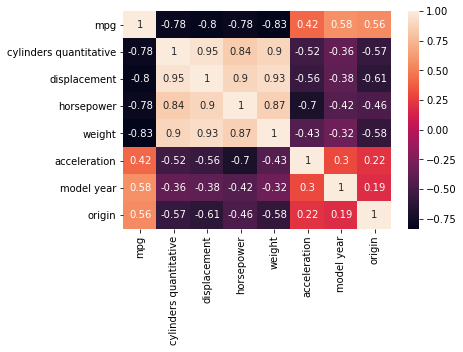

In [65]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

Deux variables sont corrélées en valeur absolue... retournez au 5.1 pour vérifier la perti- nence de votre choix.

Notre choix reste pertinent etant donnée que nos variables choisie on une 

* ||$ Cor_{(horsepower,displacement)} $||=0.9

Nous aurions pu choisir 

* || $ Cor_{(displacement,cylinder quantitative)} $ ||=0.95 

qui possède la correlation la plus importante

**Réponse aux questions**

* Une corrélation linéaire peut être encore améliorée en transformant astucieusement les données : comment ?

Différents méthode sont possible, 

**Méthode 1**

    *  Tout d'abord nous pouvons analyser la distribution de nos données de prédiction, si la distribution possèdent  des valeurs bcp trop  extremes nous pouvons les delete en effets elles biaseront notre LR qui est tres sensible aux valeurs extreme ( exemple si nous avions choisi comme variable horsepower a predire et cylinder quantitative comme variable corréle alors nous aurions remarqué que pour cylinder qunatitative==6 il y a une varible "extremes" de horsepower(160))
 
**Méthode 2**
    
    * De plus notre variables est corrélées avec plus de données que unoiquement horspower nous pouvons donc ajouter d'autre feature a notr LR pour améliorer ses prediction ( voir le test ci dessous)

**Méthode 3**

    *Nous pouvons modifier l'ordre de l'imputation en partant d'une autre matiere que du haut vers ke bas pour remplir. Pour cela nou sregardons la ou il y a le moins de données manquante dans notre tableau et nous partons de cette endroit qui a le pluss de donnéee recoltée et donc ssuceptible de commencér a prédire des valeurs plus proche de ceux que nous devrions recolter
    Cette methode etant propre a chaque imputation et n'ayant pas de random state pour supprimer les valeurs je ne pourrais pas la tester.

 ### Création d'un dataset imputé pour nos test

In [66]:
datasettest=sup_values_datasete(15,df)
datasettest=datasettest.drop('car name',axis=1)
datasetmethodebase=datasettest.copy()
datasetmethode1=datasettest.copy()
datasetmethode1bis=datasettest.copy()

<string>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:>

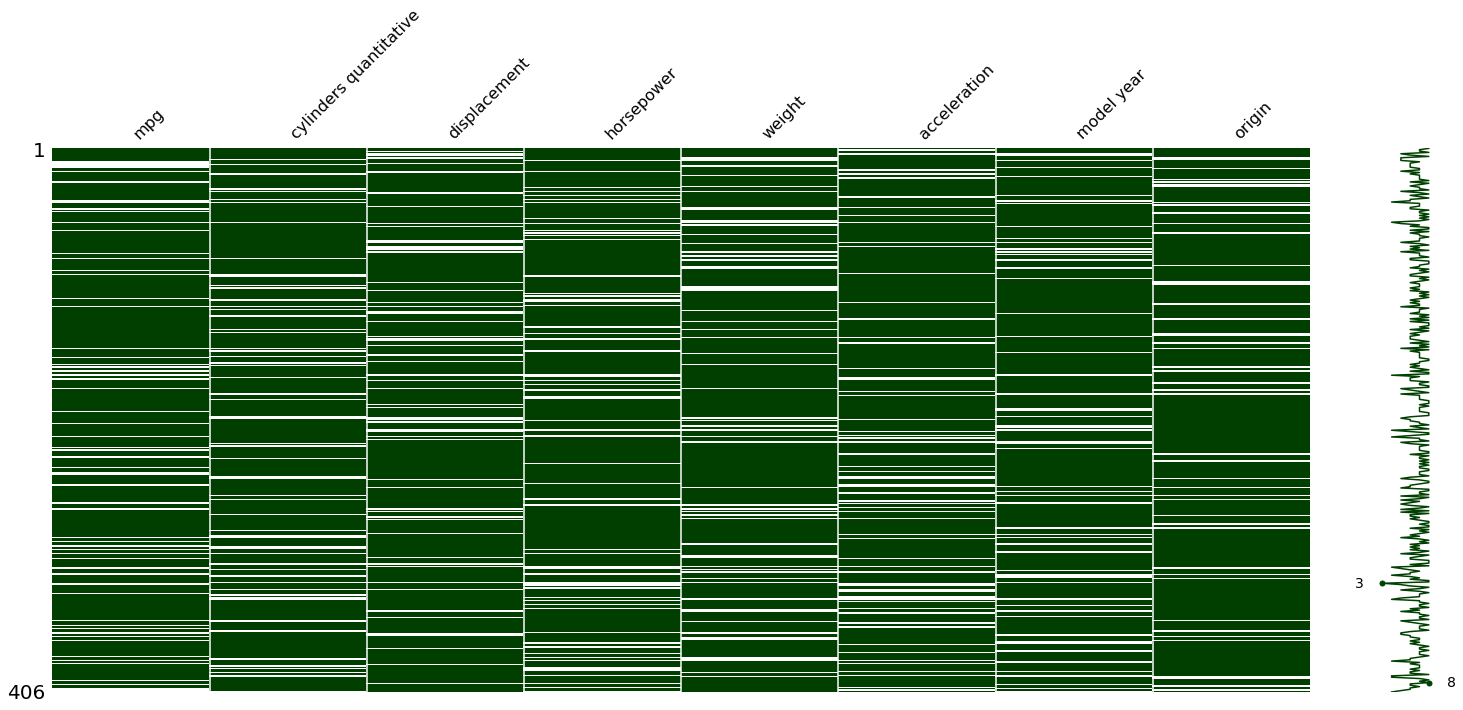

In [67]:
msno.matrix(datasetmethodebase,color=(0, 0.25,0))

**Regression linéaire**

In [68]:
scoretrain,scoretest,mse=score_estimator_LR("displacement","horsepower",datasetmethodebase,3)
print(scoretrain)
print(scoretest)
print(mse)
methodebase=[]
methodebase.append(scoretrain)
methodebase.append(scoretest)
methodebase.append(mse)
name=["scoretrain","scoretest","mse"]
methode=["methodebase","methodebase","methodebase"]
methodebase=pd.DataFrame({"names":name,"results":methodebase,"methode":methode})


methodebase

0.8541546961737416
0.8942353654025524
181.33321169717308


,names,results,methode
0,scoretrain,0.854155,methodebase
1,scoretest,0.894235,methodebase
2,mse,181.333212,methodebase


**Méthode 1**

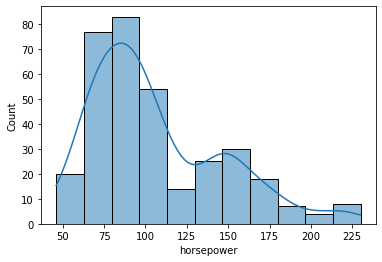

In [80]:
sns.histplot(datasettest["horsepower"], kde=True);

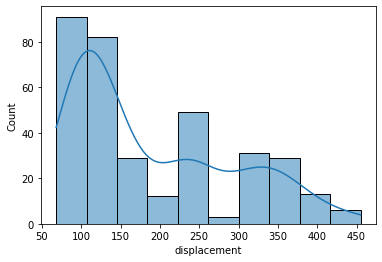

In [82]:
sns.histplot(datasettest["displacement"], kde=True);

Nos distribution possèdent peu de valeurs extremes disociable. Notre méthode sera donc peu efficace et réduira l'incertitude et la variance lors de notre prédiction.

**Methode2**

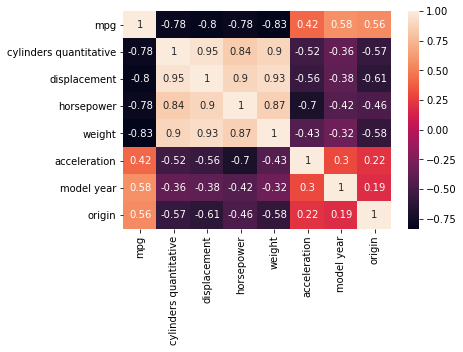

In [71]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

Nous observons que horse power esst fortement coréllé avec cylinder quantitatives,displacement et weight nous allons donc les ajouters a notre régression linaire

Soit 

* X= df['cylinder quantitatives','displacement','weight']

et 

* Y=df['horsepower']


**Imputation**

In [72]:
# definition du modele imputer
imputer = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
# fit sur le dataset
imputer.fit(datasetmethode1)
# transform du dataset
datasetmethode1 = imputer.transform(datasetmethode1)
#on retransforme en df
datasetmethode1 = pd.DataFrame(datasetmethode1, columns = ['mpg','cylinders quantitative','displacement','horsepower','weight','acceleration','model year','origin'])

/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


<AxesSubplot:>

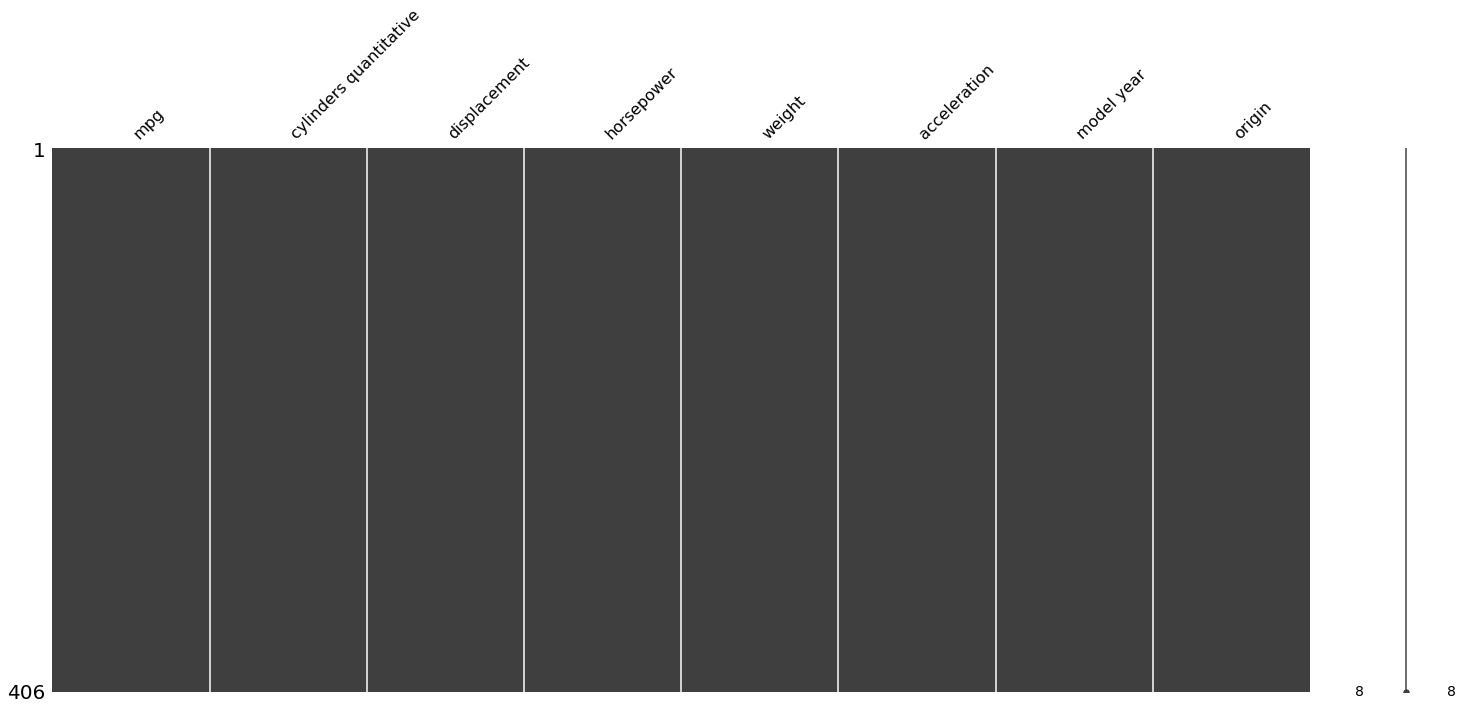

In [73]:
msno.matrix(datasetmethode1)

**Lineaire régresssions**

In [74]:
X = datasetmethode1[['cylinders quantitative','displacement','weight','acceleration','mpg']]
y= datasetmethode1["horsepower"]
X=pd.DataFrame(data=X)
y=pd.DataFrame(data=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state =0)
model = LinearRegression().fit(X_train, y_train)
model.score(X_train, y_train)
y_predict = model.predict(X_test)
model_mse1= mean_squared_error(y_predict, y_test) 
print(model_mse1)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
methode2=[]
methode2.append(model.score(X_train, y_train))
methode2.append(model.score(X_test, y_test))
methode2.append(model_mse1)
name=["scoretrain","scoretest","mse"]
methode=["methode2","methode2","methode2"]
methode2=pd.DataFrame({"names":name,"results":methode2,"methode":methode})
methode2

118.88100755075439
0.9193341650013089
0.9306335740789341


,names,results,methode
0,scoretrain,0.919334,methode2
1,scoretest,0.930634,methode2
2,mse,118.881008,methode2


Comme nous pouvons observer l'accuracy est resté la meme néanmoins l'erreur quadratique moyenne a fortement dimuné notre modèle predit donc plus proche de la "vérité" lorsque qu'on lui ajoute plus de variable corréelé

# THE BIG ERROR SCIENTIC

Lors de ce dernier test nous faisons une grosse ereur en effet nous realisons notre imputation avant de faire la séparation nous procédons donc a une contaminatio, en effet la methode itterative imput la valeur en etant une fonction des autres valeurs. Néanmoins nous avons fait attentioons a ne pas contaminer lors de notre test de toute les methode car nous devions avoir des comparaison viable. Pour les méthode ci-dessous meme ci cela n'est pas tres scientifique la contamination jouee un role minoritaire et nos resultat sont analysablee malgres la contamination

**Methode 2** sans contamination

In [75]:
scoretrain,scoretest,mse=score_estimator_LR_v2(["displacement","weight","acceleration","cylinders quantitative"],"horsepower",datasetmethode1bis,3)
methode2bis=[]
print(scoretrain)
print(scoretest)
print(mse)
methode2bis.append(scoretrain)
methode2bis.append(scoretest)
methode2bis.append(mse)

name=["scoretrain","scoretest","mse"]
methode=["methode2bis","methode2bis","methode2bis"]
methode2bis=pd.DataFrame({"names":name,"results":methode2bis,"methode":methode})
methode2bis

0.9202123159500407
0.9327220429484987
114.35083118582253


/Users/edouardnadaud/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:685: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


,names,results,methode
0,scoretrain,0.920212,methode2bis
1,scoretest,0.932722,methode2bis
2,mse,114.350831,methode2bis


**Observation: **

Nous observons un mse plus bas ainsi que des resultats de score plus eleves que sans methode d'amelioration de notre LR

# Analyse :

* methodebase
* methode2
* methode2bis

In [76]:
data_final_LR=pd.concat([methodebase,methode2,methode2bis])
data_final_LR

,names,results,methode
0,scoretrain,0.854155,methodebase
1,scoretest,0.894235,methodebase
2,mse,181.333212,methodebase
0,scoretrain,0.919334,methode2
1,scoretest,0.930634,methode2
2,mse,118.881008,methode2
0,scoretrain,0.920212,methode2bis
1,scoretest,0.932722,methode2bis
2,mse,114.350831,methode2bis


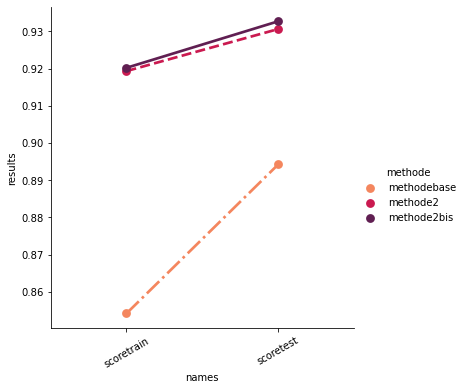

In [77]:
score=sns.catplot(x='names', y='results',hue='methode',data=data_final_LR.iloc[[0,1,3,4,6,7],:], kind='point',linestyles=["dashdot", "--","-"],palette="rocket_r")
score.set_xticklabels(rotation=30)

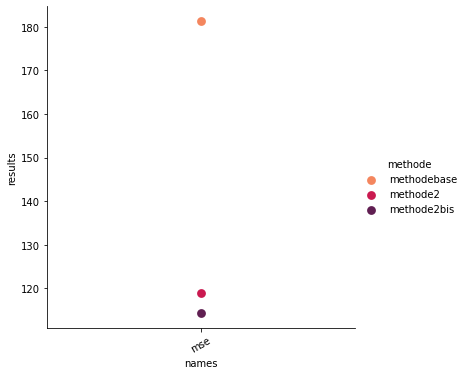

In [78]:
mse=sns.catplot(x='names', y='results',hue='methode',data= data_final_LR.iloc[[2,5,8],:], kind='point',palette="rocket_r")
mse.set_xticklabels(rotation=30)

Comme nous pouvons l'observer, avec notre methode2 et 2bis nous avons de bien meilleure resultats en test et en train, Sur la methode LR avec un imputer iterative. Deplus le mse esst drastiquement reduit. Enfin la contmination a un faible impact sur un jeu de donnée aussi petit mais a quand meme un impact.